In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ld-dataset-full-frames-augmented/LD-Dataset-Full-Frames-Augmented/true/zoomed_370.mp4_600.jpg
/kaggle/input/ld-dataset-full-frames-augmented/LD-Dataset-Full-Frames-Augmented/true/zoomed_25.mp4_0.jpg
/kaggle/input/ld-dataset-full-frames-augmented/LD-Dataset-Full-Frames-Augmented/true/zoomed_373.mp4_300.jpg
/kaggle/input/ld-dataset-full-frames-augmented/LD-Dataset-Full-Frames-Augmented/true/zoomed_229.mp4_600.jpg
/kaggle/input/ld-dataset-full-frames-augmented/LD-Dataset-Full-Frames-Augmented/true/zoomed_199.mp4_300.jpg
/kaggle/input/ld-dataset-full-frames-augmented/LD-Dataset-Full-Frames-Augmented/true/zoomed_175.mp4_300.jpg
/kaggle/input/ld-dataset-full-frames-augmented/LD-Dataset-Full-Frames-Augmented/true/zoomed_279.mp4_700.jpg
/kaggle/input/ld-dataset-full-frames-augmented/LD-Dataset-Full-Frames-Augmented/true/zoomed_48.mp4_100.jpg
/kaggle/input/ld-dataset-full-frames-augmented/LD-Dataset-Full-Frames-Augmented/true/zoomed_106.mp4_1850.jpg
/kaggle/input/ld-dataset-full-f

In [2]:
import os
import pandas as pd

In [3]:
# Define the root directories where your datasets are located
original_directory = '/kaggle/input/ld-dataset-full-frames-augmented/LD-Dataset-Full-Frames-Augmented'

In [4]:
# Initialize empty lists to store file paths and labels
original_file_paths = []
labels = []

# Define a mapping from directory names to labels
label_mapping = {
    'true': 1,
    'lie': 0
}

In [5]:
# Iterate through each subdirectory (class directory) in both the Segmented and Original directories
for class_directory in os.listdir(original_directory):
    original_class_path = os.path.join(original_directory, class_directory)

    # Check if it's a directory
    if os.path.isdir(original_class_path):
        # Get the label for this class directory
        label = label_mapping.get(class_directory, -1)  # Default to -1 if class not found

        # Iterate through each image file in the class directory
        for original_image_file in  os.listdir(original_class_path):
            original_image_path = os.path.join(original_class_path, original_image_file)

            # Append the file paths and label to the respective lists
            original_file_paths.append(original_image_path)
            labels.append(label)

In [6]:
# Create a DataFrame
df = pd.DataFrame({'Original_Img': original_file_paths, 'Label': labels})

# Optionally, you can shuffle the DataFrame if the order of the samples matters
df = df.sample(frac=1).reset_index(drop=True)

In [7]:
import cv2  # You may need to install OpenCV
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

2024-02-27 21:57:22.803228: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 21:57:22.803343: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 21:57:22.988416: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [8]:
# Image size
fftn = 128
fftm = 128

# Assuming you have a DataFrame 'df' with columns 'Original_Img', 'Segmented_Img', and 'Label'
# 'Original_Img' and 'Segmented_Img' contain file paths to original and segmented images,
# and 'Label' contains class labels
original_file_paths = df.Original_Img

In [9]:
# Function to load and preprocess an image
def load_and_preprocess_image(file_path, target_size=(fftn, fftm)):
    # Load the image using OpenCV or any other image-loading library
    img = cv2.imread(file_path)
    # Resize the image to the target size
    img = cv2.resize(img, target_size)
    # Perform any additional preprocessing if needed
    # e.g., normalizing pixel values
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img

In [10]:
df

,Original_Img,Label
0,/kaggle/input/ld-dataset-full-frames-augmented...,0
1,/kaggle/input/ld-dataset-full-frames-augmented...,1
2,/kaggle/input/ld-dataset-full-frames-augmented...,1
3,/kaggle/input/ld-dataset-full-frames-augmented...,0
4,/kaggle/input/ld-dataset-full-frames-augmented...,0
...,...,...
6244,/kaggle/input/ld-dataset-full-frames-augmented...,1
6245,/kaggle/input/ld-dataset-full-frames-augmented...,1
6246,/kaggle/input/ld-dataset-full-frames-augmented...,0
6247,/kaggle/input/ld-dataset-full-frames-augmented...,0


In [11]:
original_train_df, temp_df = train_test_split(df, test_size=0.2, random_state=20, stratify=df['Label'])
original_test_df, val_df = train_test_split(temp_df, test_size=2/3, random_state=20, stratify=temp_df['Label'])

# Load and preprocess the images for each split
original_train_images = [load_and_preprocess_image(file_path) for file_path in original_train_df['Original_Img']]
original_test_images = [load_and_preprocess_image(file_path) for file_path in original_test_df['Original_Img']]
original_val_images = [load_and_preprocess_image(file_path) for file_path in val_df['Original_Img']]


# Convert the lists of images to NumPy arrays
X_train_original = np.array(original_train_images)
X_test_original = np.array(original_test_images)
X_val_original = np.array(original_val_images)

# Concatenate the arrays
X_test_original = np.concatenate((X_test_original, X_val_original), axis=0)

# Get the corresponding labels
y_train = original_train_df['Label'].values
y_test = original_test_df['Label'].values
y_val = val_df['Label'].values


# Assuming y_test and y_val are numpy arrays
y_test = np.concatenate((y_test, y_val))

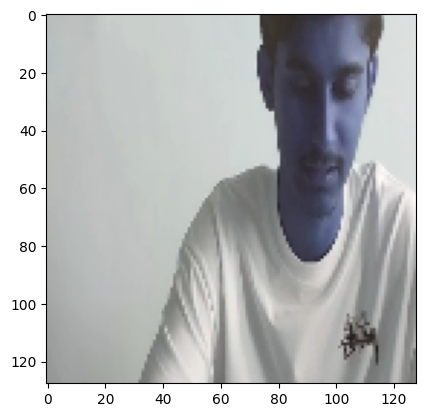

In [12]:
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
plt.imshow(X_train_original[20])

In [13]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Assuming you have loaded and preprocessed your data into X_train_original, y_train, X_val_original, y_val

SIZE_X = 128
SIZE_Y = 128

# Load VGG16 model without classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE_X, SIZE_Y, 3))

# Make loaded layers as non-trainable
for layer in VGG_model.layers:
    layer.trainable = False

# Compile the model
#VGG_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
VGG_model.summary()


58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [14]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Assuming you have loaded and preprocessed your data into X_train_original, y_train, X_val_original, y_val

SIZE_X = 128
SIZE_Y = 128

# Load DenseNet121 model without classifier/fully connected layers
Densenet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(SIZE_X, SIZE_Y, 3))

# Make loaded layers as non-trainable
for layer in Densenet121.layers:
    layer.trainable = False


# Compile the model
#densenet121.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
Densenet121.summary()

29084464/29084464 [==============================] - 0s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 134, 134, 3)          0         ['input_2[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 64, 64, 64)           9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormali

In [15]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, concatenate,Dropout, BatchNormalization
from tensorflow.keras.models import Model
import numpy as np
num_classes=2

# Load the VGG16 model
VGG_model = Model(inputs=VGG_model.input, outputs=VGG_model.get_layer('block5_conv3').output)
Densenet121 = Model(inputs=Densenet121.input, outputs=Densenet121.get_layer('conv4_block9_0_bn').output)
# Define input shapes for original and segmented images
input_original = Input(shape=(128, 128, 3), name='input_original')
# input_original = data_augmentation(input_original)
input_segmented = Input(shape=(128, 128, 3), name='input_segmented')
# input_segmented = data_augmentation(input_segmented)

# Create two new models for feature extraction
feature_extractor_original = Model(inputs=input_original, outputs=VGG_model(input_original))
feature_extractor_segmented = Model(inputs=input_segmented, outputs=Densenet121(input_segmented))

# Global Average Pooling layers to reduce dimensions and obtain feature vectors
original_features = GlobalAveragePooling2D()(feature_extractor_original.output)
segmented_features = GlobalAveragePooling2D()(feature_extractor_segmented.output)

# Combine the features
combined_features = concatenate([original_features, segmented_features])


# Add BatchNormalization before each Dense layer
x = BatchNormalization()(combined_features)
x = Dense(1024, activation='relu')(x)

x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)

x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)

x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)

x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)

x = BatchNormalization()(x)
x = Dense(32, activation='relu')(x)

x = BatchNormalization()(x)
x = Dense(16, activation='relu')(x)

output = Dense(num_classes, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=[input_original, input_segmented], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_original (InputLayer  [(None, 128, 128, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 input_segmented (InputLaye  [(None, 128, 128, 3)]        0         []                            
 r)                                                                                               
                                                                                                  
 model (Functional)          (None, 8, 8, 512)            1471468   ['input_original[0][0]']      
                                                          8                                 

In [16]:
# Train the model using your dataset
num_epochs=10
batch_size=32
history=model.fit([X_train_original, X_train_original],y_train , epochs=num_epochs, batch_size=batch_size)

Epoch 1/10


I0000 00:00:1709071149.727137      89 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


157/157 [==============================] - 29s 79ms/step - loss: 0.1057 - accuracy: 0.9576
Epoch 2/10
157/157 [==============================] - 10s 62ms/step - loss: 0.0382 - accuracy: 0.9890
Epoch 3/10
157/157 [==============================] - 10s 63ms/step - loss: 0.0260 - accuracy: 0.9920
Epoch 4/10
157/157 [==============================] - 10s 63ms/step - loss: 0.0346 - accuracy: 0.9884
Epoch 5/10
157/157 [==============================] - 10s 64ms/step - loss: 0.0198 - accuracy: 0.9920
Epoch 6/10
157/157 [==============================] - 10s 65ms/step - loss: 0.0088 - accuracy: 0.9968
Epoch 7/10
157/157 [==============================] - 10s 66ms/step - loss: 0.0058 - accuracy: 0.9988
Epoch 8/10
157/157 [==============================] - 10s 67ms/step - loss: 0.0136 - accuracy: 0.9976
Epoch 9/10
157/157 [==============================] - 11s 68ms/step - loss: 0.0166 - accuracy: 0.9960
Epoch 10/10
157/157 [==============================] - 11s 69ms/step - loss: 0.0296 - accurac

In [17]:
# Evaluate the model
train_loss, train_accuracy = model.evaluate([X_train_original,X_train_original], y_train)

# Make predictions
predictions = model.predict([X_train_original,X_train_original])
predictions=np.argmax(predictions,axis=1)

157/157 [==============================] - 11s 63ms/step


In [18]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate([X_test_original, X_test_original], y_test)

# Make predictions
predictions = model.predict([X_test_original, X_test_original])
predictions=np.argmax(predictions,axis=1)

40/40 [==============================] - 3s 64ms/step
